# Friction

## Static and Kinetic Friction

**Dry friction** is the force resisting the relative motion of solid surfaces sliding against each other. **Kinetic friction** occurs when objects are moving relative to each other and **static friction** occurs when the objects are not moving. The **normal force** is the force exerted by each surface on the other in the direction perpendicular to the surfaces in contact. **Coulomb friction** is a simple mathematical model of (dry) friction and is given by

$$
F_f \leq \mu F_n
$$

where $\mu$ is a (dimensionless) **coefficient of friction** and $F_n$ is the normal force. Note that friction always acts in the direction opposite to the motion of the objects. In other words, if the objects are in motion then $F_f = \mu F_n$ is kinetic friction and if objects are not in motion then $F_f < \mu F_n$ and $F_f$ is equal to the sum of forces acting in the direction parallel to the surface so that the objects remain stationary.

:::{seealso}
Check out [Wikipedia: Friction](https://en.wikipedia.org/wiki/Friction) for more information.
:::

### Mass Spring System in 1D with Friction

Consider a mass sliding in the $x$-direction on a surface with friction attached to a spring but no damping or external force. The normal force is $F_n = mg$ and the force of friction is

$$
F_f(x,x') = \left\{ \begin{array}{cc} -\mu mg & x' > 0 \\ \min(kx,\mu mg) & x' = 0, x > 0 \\ -\min(-kx,\mu mg) & x' = 0, x < 0 \\ \mu mg & x' < 0 \end{array} \right.
$$

applying Newton's second law yields the equation

$$
m x'' + kx = F_f(x,x')
$$

Let's plot the solution for a sinusoidal forcing function $F(t) = \cos(\omega t)$.

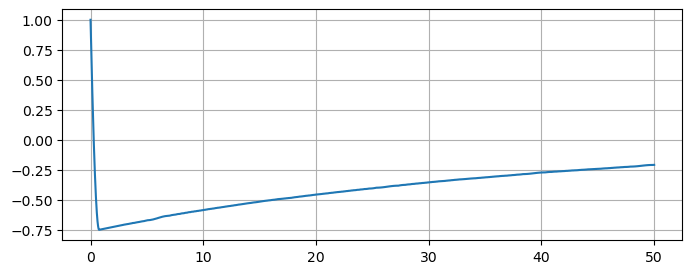

In [31]:
t = np.linspace(0,50,5000)
m = 4; k = 10; w = 5; mu = 0.5; g = 9.81;
F = lambda t: np.cos(w*t)

def Ff(u):
    if u[1] > 0.0:
        return -mu*m*g
    elif u[1] < 0.0:
        return mu*m*g
    elif u[0] > 0.0:
        return np.min([k*u[0],mu*m*g])
    elif u[0] < -0.0:
        return -np.min([-k*u[0],mu*m*g])
    else:
        return 0.0

def odeEulerSys(f,t,u0):
    u = np.zeros([len(t),len(u0)])
    u[0,:] = u0
    for n in range(0,len(t)-1):
        u[n+1,:] = u[n,:] + f(t[n],u[n,:])*(t[n+1] - t[n])
    return u

f = lambda t,u: np.array([u[1],( Ff(u) - c*u[1] - k*u[0])/m])
u0 = [1,-4]
u = odeEulerSys(f,t,u0)

plt.figure(figsize=(8,3))
plt.plot(t,u[:,0]), plt.grid(True)
plt.show()